# Dealing with Outliers

Sometimes outliers can mess up an analysis; you usually don't want a handful of data points to skew the overall results. Let's revisit our example of income data, with some random billionaire thrown in:

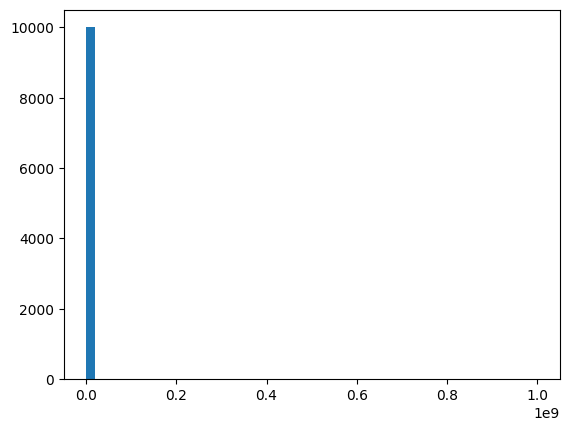

In [3]:
%matplotlib inline

import numpy as np

np.random.seed(100)

# Gera 10000 números aleatórios com média de 27000 e desvio padrão de 15000
incomes = np.random.normal(27000, 15000, 10000)

incomes = np.append(incomes, [1000000000]) # Adiciona um outlier ao conjunto de dados

import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()


That's not very helpful to look at. One billionaire ended up squeezing everybody else into a single line in my histogram. Plus it skewed my mean income significantly:

In [4]:
incomes.mean() # O outlier afeta muito a média

127004.56371611758

It's important to dig into what is causing your outliers, and understand where they are coming from. You also need to think about whether removing them is a valid thing to do, given the spirit of what it is you're trying to analyze. If I know I want to understand more about the incomes of "typical Americans", filtering out billionaires seems like a legitimate thing to do.

Here's something a little more robust than filtering out billionaires - it filters out anything beyond two standard deviations of the median value in the data set:

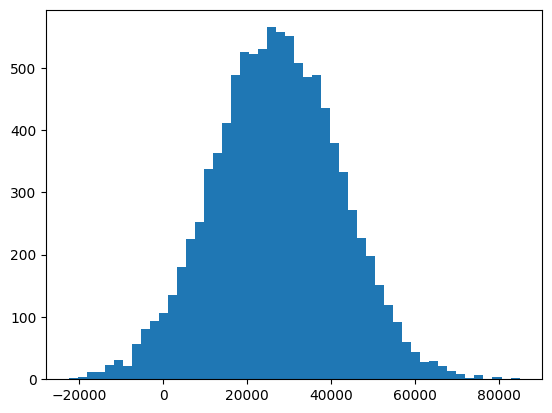

In [6]:
def reject_outliers(data):
    u = np.median(data) # Calcula a mediana dos dados
    s = np.std(data) # Calcula o desvio padrão dos dados
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)] 
    # Mantém apenas os dados que estão a 2 desvios padrão da mediana
    return filtered

filtered = reject_outliers(incomes) # Filtra os outliers

plt.hist(filtered, 50)
plt.show()

That looks better. And, our mean is more, well, meangingful now as well:

In [7]:
np.mean(filtered) # A média dos dados filtrados é mais próxima da média original

27017.26417248919